# PERKENALAN

**Kelompok Final Project 1**

Muhammat Rayyan Nasution_PYTN-KS08-015 & Muchtar Ali Yahya_PYTN-KS08-023


Uber and Lyft Dataset Boston, MA
Dataset ini berisi perbandingan sampel harga dua perusahaan yang menyediakan jasa transportasi online, Uber dan Lyft.

Model Linear Regression akan diimplementasikan pada dataset ini

# IMPORT PUSTAKA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
data = pd.read_csv("rideshare_kaggle.csv")
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [ ]:
data.shape # Untuk mengetahui jumlah (baris, column)

(693071, 57)

In [ ]:
data.columns # Untuk mengetahui nama semua columns pada Dataset

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [ ]:
data.describe() # Untuk melihat ringkasan data

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


# Data Cleaning

Dalam membersihkan data, kita bisa mengisi missing value, menghapus baris yang missing, atau menambah dan mengurangi column yang tidak digunakan

Mengecek missing value

In [ ]:
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
from scipy.stats import mode

data['price'] = data['price'].fillna(data['price'].mode()[0]) # Mengisi missing value jika terdapat missing

data.isnull().sum() # Untuk mengecek kembali

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [ ]:
data = data.dropna() # Untuk menghapus baris yang terdapat missing value
data.shape

(693071, 57)

Kami lebih memilih mengisi missing value daripada menghapus yang terdapat missing, karena menghapus baris menggunakan 'dropna' memiliki kelemahan yaitu data akan menjadi lebih sedikit atau berkurang

Karena column 'datetime' masih berupa string/object maka kita akan mengubahnya menjadi type data tanggal(datetime)

In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'])
data.head() #untuk mengecek saja

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Untuk melihat informasi Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

# Explorasi Data

Kami akan mengelompokkan data (Filtering) agar mudah di visualisasikan

In [ ]:
data1 = data[['timestamp','hour','day','month','datetime','cab_type','name','price','distance']]
data1

,timestamp,hour,day,month,datetime,cab_type,name,price,distance
0,1.544953e+09,9,16,12,2018-12-16 09:30:07,Lyft,Shared,5.0,0.44
1,1.543284e+09,2,27,11,2018-11-27 02:00:23,Lyft,Lux,11.0,0.44
2,1.543367e+09,1,28,11,2018-11-28 01:00:22,Lyft,Lyft,7.0,0.44
3,1.543554e+09,4,30,11,2018-11-30 04:53:02,Lyft,Lux Black XL,26.0,0.44
4,1.543463e+09,3,29,11,2018-11-29 03:49:20,Lyft,Lyft XL,9.0,0.44
...,...,...,...,...,...,...,...,...,...
693066,1.543708e+09,23,1,12,2018-12-01 23:53:05,Uber,UberXL,13.0,1.00
693067,1.543708e+09,23,1,12,2018-12-01 23:53:05,Uber,UberX,9.5,1.00
693068,1.543708e+09,23,1,12,2018-12-01 23:53:05,Uber,Taxi,7.0,1.00
693069,1.543708e+09,23,1,12,2018-12-01 23:53:05,Uber,Black SUV,27.0,1.00


Karena banyaknya macam jarak setiap jenis Ubernya. Maka kami filter agar jarak menjadi 1 semua

In [ ]:
dataUber = data1[(data1.cab_type == "Uber") & (data1.distance == 1)]
dataUber

,timestamp,hour,day,month,datetime,cab_type,name,price,distance
9520,1.543893e+09,3,4,12,2018-12-04 03:13:01,Uber,UberXL,10.5,1.0
9522,1.543226e+09,9,26,11,2018-11-26 09:50:09,Uber,Black SUV,26.0,1.0
9523,1.543865e+09,19,3,12,2018-12-03 19:28:01,Uber,WAV,7.0,1.0
9527,1.543471e+09,5,29,11,2018-11-29 05:58:03,Uber,Taxi,7.0,1.0
9528,1.543525e+09,20,29,11,2018-11-29 20:57:55,Uber,UberX,7.0,1.0
...,...,...,...,...,...,...,...,...,...
693066,1.543708e+09,23,1,12,2018-12-01 23:53:05,Uber,UberXL,13.0,1.0
693067,1.543708e+09,23,1,12,2018-12-01 23:53:05,Uber,UberX,9.5,1.0
693068,1.543708e+09,23,1,12,2018-12-01 23:53:05,Uber,Taxi,7.0,1.0
693069,1.543708e+09,23,1,12,2018-12-01 23:53:05,Uber,Black SUV,27.0,1.0


Seperti uber, Lyft juga kami samakan jaraknya menjadi 1

In [ ]:
dataLyft = data1[(data1.cab_type == "Lyft") & (data1.distance == 1)]
dataLyft

,timestamp,hour,day,month,datetime,cab_type,name,price,distance
1017,1.543582e+09,12,30,11,2018-11-30 12:52:56,Lyft,Shared,3.0,1.0
1018,1.543345e+09,18,27,11,2018-11-27 18:57:22,Lyft,Lyft,7.0,1.0
1019,1.543572e+09,9,30,11,2018-11-30 09:53:02,Lyft,Lux Black XL,27.5,1.0
1020,1.544700e+09,11,13,12,2018-12-13 11:20:08,Lyft,Lyft XL,10.5,1.0
1021,1.543220e+09,8,26,11,2018-11-26 08:21:03,Lyft,Lux,13.5,1.0
...,...,...,...,...,...,...,...,...,...
692788,1.543424e+09,16,28,11,2018-11-28 16:59:07,Lyft,Shared,7.0,1.0
692789,1.543424e+09,16,28,11,2018-11-28 16:59:07,Lyft,Lux,16.5,1.0
692790,1.543424e+09,16,28,11,2018-11-28 16:59:07,Lyft,Lux Black,22.5,1.0
692791,1.543424e+09,16,28,11,2018-11-28 16:59:07,Lyft,Lyft,9.0,1.0


Kita akan melakukan visualisasi sederhana

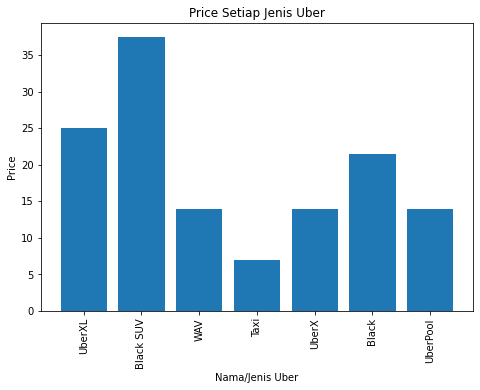

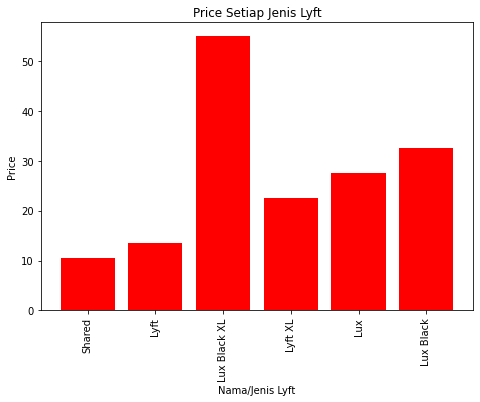

In [ ]:
fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
x = (dataUber.name)
y = (dataUber.price)
ax.bar(x,y)
plt.xlabel('Nama/Jenis Uber')
plt.ylabel('Price')
plt.title('Price Setiap Jenis Uber')
plt.xticks(rotation = 'vertical')

fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
x = (dataLyft.name)
y = (dataLyft.price)
ax.bar(x,y, color='red')
plt.xlabel('Nama/Jenis Lyft')
plt.ylabel('Price')
plt.title('Price Setiap Jenis Lyft')
plt.xticks(rotation = 'vertical')
plt.show()

Bisa disimpulkan pada diagram diatas bahwa *Black SUV* merupakan jenis Uber dengan price tertinggi, dan *Lux Black XL* merupakan jenis Lyft dengan price tertinggi. Sekaligus *Taxi* merupakan jenis Uber dengan price terendah, dan *Shared* merupakan jenis Lyft dengan price terendah

Dan jika di disimpulkan kedua diagram tersebut, Lyft lebih mahal daripada Uber

# Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

In [ ]:
data2 = data[['timestamp','cab_type','name','price','distance','latitude','longitude']]
data2

,timestamp,cab_type,name,price,distance,latitude,longitude
0,1.544953e+09,Lyft,Shared,5.0,0.44,42.2148,-71.0330
1,1.543284e+09,Lyft,Lux,11.0,0.44,42.2148,-71.0330
2,1.543367e+09,Lyft,Lyft,7.0,0.44,42.2148,-71.0330
3,1.543554e+09,Lyft,Lux Black XL,26.0,0.44,42.2148,-71.0330
4,1.543463e+09,Lyft,Lyft XL,9.0,0.44,42.2148,-71.0330
...,...,...,...,...,...,...,...
693066,1.543708e+09,Uber,UberXL,13.0,1.00,42.3519,-71.0643
693067,1.543708e+09,Uber,UberX,9.5,1.00,42.3519,-71.0643
693068,1.543708e+09,Uber,Taxi,7.0,1.00,42.3519,-71.0643
693069,1.543708e+09,Uber,Black SUV,27.0,1.00,42.3519,-71.0643


Sebelum mengolah data tersebut, kita akan merubah isi column *cab_type* dan column *name* menjadi angka

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
data['cab_type'] = encoder.fit_transform(data['cab_type'])

In [ ]:
data['name'] = encoder.fit_transform(data['name'])

Memilih target untuk diprediksi (Prediction Target)

Target yang akan kami prediksi adalah column 'price'

In [ ]:
y = data['price']
y

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693066    13.0
693067     9.5
693068     7.0
693069    27.0
693070    10.0
Name: price, Length: 693071, dtype: float64

Features Selection

In [ ]:
features = ['timestamp','cab_type','name','distance','latitude','longitude']
X = data[features]
X

,timestamp,cab_type,name,distance,latitude,longitude
0,1.544953e+09,0,7,0.44,42.2148,-71.0330
1,1.543284e+09,0,2,0.44,42.2148,-71.0330
2,1.543367e+09,0,5,0.44,42.2148,-71.0330
3,1.543554e+09,0,4,0.44,42.2148,-71.0330
4,1.543463e+09,0,6,0.44,42.2148,-71.0330
...,...,...,...,...,...,...
693066,1.543708e+09,1,11,1.00,42.3519,-71.0643
693067,1.543708e+09,1,10,1.00,42.3519,-71.0643
693068,1.543708e+09,1,8,1.00,42.3519,-71.0643
693069,1.543708e+09,1,1,1.00,42.3519,-71.0643


In [ ]:
X.describe()

,timestamp,cab_type,name,distance,latitude,longitude
count,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000
mean,1.544046e+09,0.556455,6.050107,2.189430,42.338172,-71.066151
std,6.891925e+05,0.496803,3.780584,1.138937,0.047840,0.020302
min,1.543204e+09,0.000000,0.000000,0.020000,42.214800,-71.105400
25%,1.543444e+09,0.000000,3.000000,1.280000,42.350300,-71.081000
50%,1.543737e+09,1.000000,6.000000,2.160000,42.351900,-71.063100
75%,1.544828e+09,1.000000,9.000000,2.920000,42.364700,-71.054200
max,1.545161e+09,1.000000,12.000000,7.860000,42.366100,-71.033000


# Membangun model

Membangun ML (machine learning) model dengan *Decision Tree Regressor*

Import

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Kita akan memanfaatkan Decision Tree untuk melakukan proses regresi atau menambah nilai

KONFIGURASI MODEL

In [ ]:
data_model = DecisionTreeRegressor(random_state=1)

Training Model

In [ ]:
data_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Melakukan Prediksi

In [ ]:
data_model.predict(X.head())

array([ 5., 11.,  7., 26.,  9.])

In [ ]:
y.head()

0     5.0
1    11.0
2     7.0
3    26.0
4     9.0
Name: price, dtype: float64

Dan jika dilihat, bisa disimpulkan bahwa prediksi dari model Decision Tree sangat akurat ketika dibandingkan

# Evaluasi model

Evaluasi terhadap model

In [ ]:
from sklearn.metrics import mean_absolute_error

Rata rata absolute eror

In [ ]:
y_hat = data_model.predict(X)
mean_absolute_error(y, y_hat)

0.06126839818719873

Training and Testing dataset

In [ ]:
from sklearn.model_selection import train_test_split

membagi dataset menjadi 2 bagian

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

Konfigurasi dan training model

In [ ]:
data_model = DecisionTreeRegressor(random_state=1)
data_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

Evaluasi Model

In [ ]:
y_hat = data_model.predict(X_test)
mean_absolute_error(y_test, y_hat)

1.7681577383013598

Output diatas merupakan tingkat error dalam mempredict